<h1>라이브러리 사용

In [26]:
import pandas as pd # 데이터 분석
import urllib.request # 서버에 요청
import json # 데이터를 json포맷으로 바꾸기
import matplotlib.pyplot as plt # 데이터 시각화

<h1>API 추출

In [35]:
client_id = "W3fPWgvUru_vubkZQOUV" # 발급 받은 아이디
client_secret = "a55vs5QmYf" # 발급 받은 비밀번호

url = "https://openapi.naver.com/v1/datalab/search"

# 사용자가 원하는 데이터를 호출하는 코드
body = "{\
         \"startDate\":\"2023-01-01\",\
         \"endDate\":\"2023-04-06\",\
         \"timeUnit\":\"date\",\
         \"keywordGroups\":[{\"groupName\":\"파이썬\",\"keywords\":[\"파이썬\",\"python\",\"python활용\",\"python공부\",\"pycharm\",\"jupyterNotebook\",\"주피터노트북\",\"python라이브러리\"]},\
                             {\"groupName\":\"자바\",\"keywords\":[\"자바\",\"java\"]},\
                             {\"groupName\":\"자바스크립트\",\"keywords\":[\"javascript\",\"Node.js\"]},\
                             {\"groupName\":\"데이터베이스\",\"keywords\":[\"데이터베이스\",\"sql\",\"oracle\"]}\
                            ],\
         \"device\":\"mo\",\
         \"ages\":[\"3\",\"5\"],\
         \"gender\":\"m\"\
         }";

# startDate='2022-01-01'  # 데이터 수집 시작일
# endDate='2023-03-01' # 데이터 수집 시작일
# timeUnit='month'  #'date','week','month' 데이터 구간 단위 설정
# keywordGroups=[  # 사용자가 원하는 키워드 입력 / 최대 5개까지 동시호출 가능 / 세부 키워드는 최대 20개까지 가능

#     {'groupName':'파이썬', 'keywords':['파이썬','파이썬크롤링','파이썬활용법']},
#     {'groupName':'자바', 'keywords':['자바','자바활용','자바공부']},
#     {'groupName':'C언어', 'keywords':['C#','C','C++']},
#     {'groupName':'자바스크립트', 'keywords':['java','Node.js']},
# ]
# device='mo'  #'pc','mo' # pc검색량 또는 mobile 검색량 선택
# gender='m'   #'m','f' # 검색 성별을 선택
# ages=['3','4','5']  # 연령 별로 선택할 수 있으며, 최대 가능 5
# #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세,
# #5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상

# 네이버 api 서버에 request 요청을 보내고 다시 응답하는 코드
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))

rescode = response.getcode()

# 요청 후 응답 받은 데이터가 코드 또는 서버 오류 때문에 유실 될 수 있기 때문에 응답 코드를 활용 if 조건문 삽입
# 만약 응답이 정상 상태면 if 내부 코드가 실행되어 응답 데이터를 utf-8로 변경하여 response_data 객체에 담고,
# 아닐 경우 error 코드와 함께 오류 메시지를 출력합니다.
if(rescode==200):
    response_body = response.read()
    response_data = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

# 데이터를 다루기 편하도록 json 타입으로 변경
result = json.loads(response_data)

print(result)

# 원하는 검색량 데이터를 얻었지만 사람이 식별하기 어렵기 때문에 시각적으로 가공을 진행. 
# 우선 전달 받은 데이터는 딕셔너리와 리스트의 형태를 가지기 때문에 
# 각 데이터를 카테고리화 시키기 위해 for문을 사용하여 객체에 담아야 한다.
date = [a['period'] for a in result['results'][0]['data']] # 기간 데이터
ratio_data1 = [a['ratio'] for a in result['results'][0]['data']]
ratio_data2 = [a['ratio'] for a in result['results'][1]['data']]
ratio_data3 = [a['ratio'] for a in result['results'][2]['data']]
ratio_data4 = [a['ratio'] for a in result['results'][3]['data']]

datalab = pd.DataFrame({'date':date,
                          'searching_result':ratio_data1,
                          'searching_result2':ratio_data2,
                          'searching_result3':ratio_data3,
                          'searching_result4':ratio_data4})

datalab

{'startDate': '2023-01-01', 'endDate': '2023-04-06', 'timeUnit': 'date', 'results': [{'title': '파이썬', 'keywords': ['파이썬', 'python', 'python활용', 'python공부', 'pycharm', 'jupyterNotebook', '주피터노트북', 'python라이브러리'], 'data': [{'period': '2023-01-01', 'ratio': 22.73972}, {'period': '2023-01-02', 'ratio': 37.26027}, {'period': '2023-01-03', 'ratio': 30.41095}, {'period': '2023-01-04', 'ratio': 31.78082}, {'period': '2023-01-05', 'ratio': 30.9589}, {'period': '2023-01-06', 'ratio': 32.87671}, {'period': '2023-01-07', 'ratio': 25.75342}, {'period': '2023-01-08', 'ratio': 22.73972}, {'period': '2023-01-09', 'ratio': 35.06849}, {'period': '2023-01-10', 'ratio': 36.71232}, {'period': '2023-01-11', 'ratio': 30.41095}, {'period': '2023-01-12', 'ratio': 24.38356}, {'period': '2023-01-13', 'ratio': 35.34246}, {'period': '2023-01-14', 'ratio': 24.9315}, {'period': '2023-01-15', 'ratio': 24.10958}, {'period': '2023-01-16', 'ratio': 29.86301}, {'period': '2023-01-17', 'ratio': 35.89041}, {'period': '2023

,date,searching_result,searching_result2,searching_result3,searching_result4
0,2023-01-01,22.73972,7.94520,0.82191,17.53424
1,2023-01-02,37.26027,11.23287,4.38356,19.17808
2,2023-01-03,30.41095,12.32876,4.10958,19.72602
3,2023-01-04,31.78082,11.23287,4.93150,23.83561
4,2023-01-05,30.95890,10.13698,3.28767,20.27397
...,...,...,...,...,...
91,2023-04-02,25.20547,5.20547,3.01369,16.43835
92,2023-04-03,44.93150,10.95890,6.30136,23.01369
93,2023-04-04,43.56164,12.05479,5.20547,26.84931
94,2023-04-05,36.43835,12.32876,3.01369,27.67123


In [36]:
datalab.columns

Index(['date', 'searching_result', 'searching_result2', 'searching_result3',
       'searching_result4'],
      dtype='object')

<h3>열 이름 바꾸기

In [37]:
datalab = datalab.rename(columns={'date': '검색날짜',
                                  'searching_result': '검색결과1',
                                  'searching_result2': '검색결과2',
                                  'searching_result3': '검색결과3',
                                  'searching_result4': '검색결과4'})
datalab

,검색날짜,검색결과1,검색결과2,검색결과3,검색결과4
0,2023-01-01,22.73972,7.94520,0.82191,17.53424
1,2023-01-02,37.26027,11.23287,4.38356,19.17808
2,2023-01-03,30.41095,12.32876,4.10958,19.72602
3,2023-01-04,31.78082,11.23287,4.93150,23.83561
4,2023-01-05,30.95890,10.13698,3.28767,20.27397
...,...,...,...,...,...
91,2023-04-02,25.20547,5.20547,3.01369,16.43835
92,2023-04-03,44.93150,10.95890,6.30136,23.01369
93,2023-04-04,43.56164,12.05479,5.20547,26.84931
94,2023-04-05,36.43835,12.32876,3.01369,27.67123


In [60]:
datalab.columns

Index(['검색날짜', '검색결과1', '검색결과2', '검색결과3', '검색결과4'], dtype='object')

<h3>.csv로 가공 및 저장

In [162]:
datalab.to_csv('./../data/naver.csv')

print('파일 저장 완료')

파일 저장 완료


<h3>한글 깨짐 방지

In [46]:
plt.rc('font', family='Malgun Gothic')

<h3>2023년 프로그래밍 언어 검색량

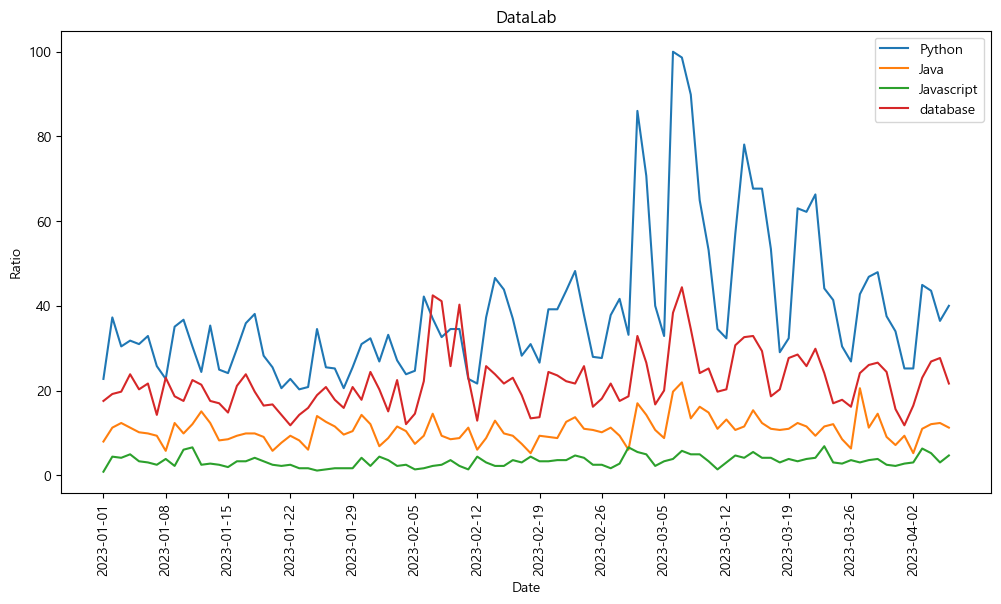

In [47]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(12,6))
plt.title("DataLab")
plt.xlabel("Date")
plt.ylabel("Ratio")

# 그래프 그리기
plt.plot(date, ratio_data1, label='Python')
plt.plot(date, ratio_data2, label='Java')
plt.plot(date, ratio_data3, label='Javascript')
plt.plot(date, ratio_data4, label='database')

# x축 설정 가독성을 위해 7일 간격으로 설정
plt.xticks(date[::7], rotation='vertical')

# 범례 추가
plt.legend(loc='upper right')

# 그래프 출력
plt.show()

<h3>2023년 일별 합산 검색량 분포도

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 데이터 불러오기
df = pd.read_csv('./../data/naver.csv', sep=',')

df = df.set_index('검색날짜')

total1 = df['검색결과1'].sum()
total2 = df['검색결과2'].sum()
total3 = df['검색결과3'].sum()
total4 = df['검색결과4'].sum()

totals = [total1, total2, total3, total4]

# 각 항목별 색상 설정
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

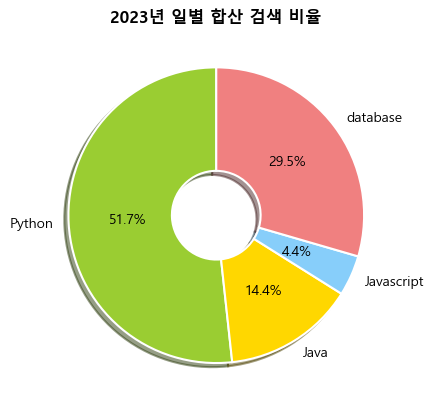

In [59]:
# 파이차트 그리기
labels = ['Python', 'Java', 'Javascript', 'database']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1.5}
plt.pie(totals, labels=labels, colors=colors, wedgeprops=wedgeprops, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('2023년 일별 합산 검색 비율', fontweight='bold')
plt.show()

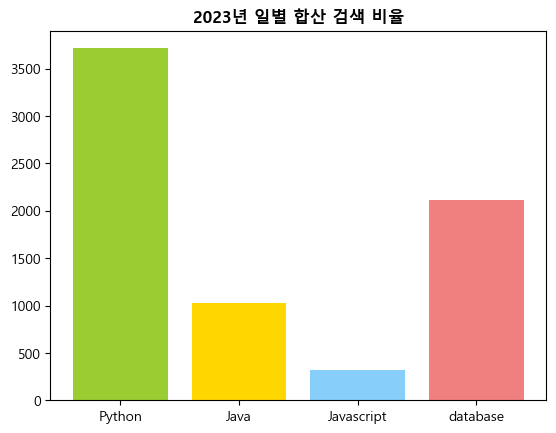

In [164]:
# 바 차트 그리기
labels = ['Python', 'Java', 'Javascript', 'database']
values = [total1, total2, total3, total4]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.bar(labels, values, color=colors)
plt.title('2023년 일별 합산 검색 비율', fontweight='bold')

plt.show()

<h3>def 활용</h3>
가독성을 높이기 위한 활용

파일이 저장되었습니다.


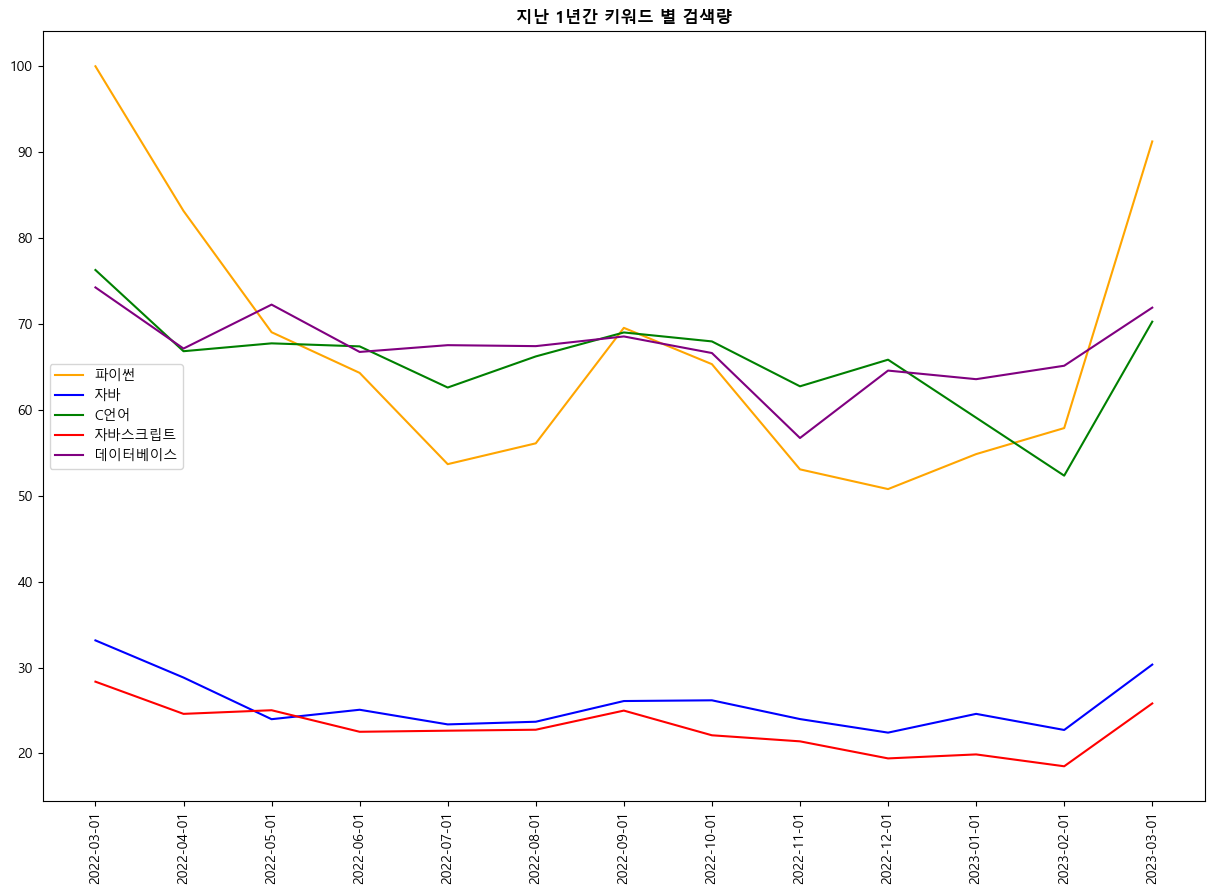

In [167]:
def getresult(startDate, endDate, timeUnit, keywordGroups, device, gender, ages):
    url = "https://openapi.naver.com/v1/datalab/search";

    body_dict = {}  # 검색 정보를 저장할 변수
    body_dict['startDate'] = startDate
    body_dict['endDate'] = endDate
    body_dict['timeUnit'] = timeUnit
    body_dict['keywordGroups'] = keywordGroups
    body_dict['device'] = device
    body_dict['gender'] = gender
    body_dict['ages'] = ages

    body = str(body_dict).replace("'", '"')  # ' 문자로는 에러가 발생해서 " 로 변환

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if (rescode == 200):
        response_body = response.read()
        response_json = json.loads(response_body)
    else:
        print("Error Code:" + rescode)

    # 결과데이터중 'data' 와 'title'만 따로 DataFrame으로 저장
    response_results = pd.DataFrame()
    for data in response_json['results']:
        result = pd.DataFrame(data['data'])
        result['title'] = data['title']

        response_results = pd.concat([response_results, result])
        response_results.to_csv('./../data/naverdata.csv')

    print('파일이 저장되었습니다.')
    
    # title별로 그래프를 그리기 위한부분
    titles = response_results['title'].unique()

     # 그래프 컬러 설정
    colors = ['orange', 'blue', 'green', 'red', 'purple']
    
    plt.figure(figsize=(15, 10))

    for i, title in enumerate(titles):
        data = response_results.loc[response_results['title'] == title, :]

        plt.plot(data['period'], data['ratio'], label=title, color=colors[i % len(colors)])
        
        # plt.bar(data['period'], data['ratio'], label=title, color=colors[i % len(colors)])

        plt.plot(linewidth=5)
        
        plt.xticks(rotation=90)
        plt.legend()
        plt.title('지난 1년간 키워드 별 검색량', fontweight='bold')
    plt.show()
    
    
client_id = "W3fPWgvUru_vubkZQOUV"
client_secret = "a55vs5QmYf"

startDate='2022-03-01'
endDate='2023-03-31'
timeUnit='month'  #'date','week','month'
keywordGroups=[ # 메인 키워드 1개 / 세부 키워드 20개까지 가능
    {'groupName':'파이썬', 'keywords':['파이썬','파이썬크롤링','파이썬프로젝트']},
    {'groupName':'자바', 'keywords':['자바','자바 연산자','자바 기초','java']},
    {'groupName':'C언어', 'keywords':['C#','C','C++']},
    {'groupName':'자바스크립트', 'keywords':['javascript','Node.js','자바스크립트']},
    {'groupName':'데이터베이스', 'keywords':['database','oracle','sql','오라클']}
]
device='mo'  #'pc','mo'
gender='m'   #'m','f'
ages=['3','4','5']  #1: 0∼12세, 2: 13∼18세, 3: 19∼24세, 4: 25∼29세,
#5: 30∼34세, 6: 35∼39세, 7: 40∼44세, 8: 45∼49세, 9: 50∼54세, 10: 55∼59세, 11: 60세 이상

getresult(startDate,endDate,timeUnit,keywordGroups,device,gender,ages)

<h1>word cloud

In [116]:
dataInFolder = './../data/'
filename = dataInFolder + 'Programming Language.txt'

language = open(filename, encoding='UTF-8').read()

print(language)

C 프로그래밍 언어로 작성된 단순한 컴퓨터의 프로그램의 소스 코드. 컴파일되어 실행되었을 때 헬로 월드 메시지를 보여주고 있다.
프로그래밍 언어(programming language)는 컴퓨터 시스템을 구동시키는 소프트웨어를 작성하기 위한 형식언어이다. 고급 언어일수록 사람이 사용하는 언어에 가깝다.

일반적으로 말할 때에는 프로그래밍 언어를 지원하는 소프트웨어, 곧 소프트웨어를 작성하기 위한 소프트웨어를 가리키는 때가 많고, 이때에는 프로그래밍 언어와 소프트웨어를 구분하지 않고 소프트웨어를 프로그래밍 언어로 보기도 한다.[출처 필요] 예를 들면, 델파이는 프로그래밍 언어인 오브젝트 파스칼을 지원하는 소프트웨어를 작성하기 위한 소프트웨어일 뿐이지만, 델파이를 별개의 프로그래밍 언어로 보는 때가 더 많다.[출처 필요]

역사
이 부분의 본문은 프로그래밍 언어의 역사입니다.
최초의 컴퓨터는 종종 프로그래밍 언어의 도움 없이 프로그래밍되었는데, 이는 프로그램들을 절대적인 기계어로 작성함으로써 이루어졌다. 10진이나 이진 형태의 프로그램들은 천공 카드나 자기 테이프로부터 읽거나 컴퓨터 프론트 패널의 스위치를 켜고 끔으로써 불러들였다. 절대적인 기계어는 나중에 1세대 프로그래밍 언어(1GL)로 명칭이 정해졌다.

다음 단계로 이른바 2세대 프로그래밍 언어(2GL), 곧 어셈블리어가 개발되었으며 여전히 특정 컴퓨터의 명령어 집합 구조와 밀접하게 관계되었다. 프로그램을 훨씬 더 인간이 읽기 쉽게 만들어주었을 뿐 아니라, 주소 계산 시 따분하고 오류가 발생할 경향이 있는 프로그래머를 안심시켜 주었다.

최초의 고급 프로그래밍 언어, 즉 3세대 프로그래밍 언어(3GL)는 1950년대에 작성되었다. 컴퓨터용으로 설계될 초기의 고급 프로그래밍 언어는 Plankalkül였으며, 콘라트 추제가 1943년부터 1945년까지 독일의 Z3용으로 개발될 것이었다. 그러나 1998년, 2000년까지 구현되지 않았다.[1]

4세대 프로그래밍 언어(4GL)는 3세대 프로그래밍 언어 보다 내부 

In [117]:
# url : https://konlpy.org/ko/latest/
from konlpy.tag import Komoran

In [130]:
# 사용자 정의 단어들을 정하시고, 사용자 정의 사전에 추가하도록 합니다.
lan_dict = dataInFolder + 'lan_dic.txt' # 사용자 정의 사전
komo = Komoran(userdic=lan_dict) # 객체 생성
token_list = komo.nouns(language) # nouns : 명사 추출

print('토큰 목록')
print(token_list)

토큰 목록
['프로그래밍 언어', '작성', '컴퓨터', '프로그램', '소스 코드', '컴파일', '실행', '때', '헬로', '월드', '메시지', '프로그래밍 언어', '컴퓨터', '시스템', '구동', '소프트웨어', '작성', '형식', '언어', '고급', '언어', '사람', '사용', '언어', '일반', '말', '때', '프로그래밍 언어', '지원', '소프트웨어', '소프트웨어', '작성', '소프트웨어', '때', '이때', '프로그래밍 언어', '소프트웨어', '구분', '소프트웨어', '프로그래밍 언어', '출처 필요', '예', '델파이', '프로그래밍 언어', '오브젝트 파스칼', '지원', '소프트웨어', '작성', '소프트웨어', '뿐', '델파이', '별개', '프로그래밍 언어', '때', '출처 필요', '역사', '부분', '본문', '프로그래밍 언어의 역사', '최초', '컴퓨터', '프로그래밍 언어', '도움', '프로그래밍', '프로그램', '절대', '기계어', '작성', '진', '이진', '형태', '프로그램', '천공 카드', '자기 테이프', '컴퓨터', '프론트', '패널', '스위치', '끔', '절대', '기계어', '나중', '세대', '프로그래밍 언어', '명칭', '다음', '단계', '세대', '프로그래밍 언어', '어셈블리어', '개발', '특정', '컴퓨터', '명령어 집합', '구조', '밀접', '관계', '프로그램', '인간', '읽기', '뿐', '주소', '계산', '시', '오류', '발생', '경향', '프로그래머', '안심', '최초', '고급 프로그래밍 언어', '3세대 프로그래밍 언어', '1950년대', '작성', '컴퓨터', '설계', '초기', '고급 프로그래밍 언어', '콘라트 추제', '년', '년', '독일', '개발', '것', '1998년', '년', '구현', '4세대 프로그래밍 언어', '3세대 프로그래밍 언어', '내부', '컴퓨터 하드웨어', '부분',

In [133]:
# 불용어(stopword) : 빈도는 많지만, 분석시 중요하지 않다고 판단하는 단어들
stop_dict = dataInFolder + 'stop_dict.txt' # 불용어 파일
stop_file = open(stop_dict, encoding='UTF-8').readlines()
stop_words = [word.strip() for word in stop_file]

print('불용어 리스트')
print(stop_words)

new_token_list = [word for word in token_list if word not in stop_words]
print('불용어 제외된 토큰 목록')
print(new_token_list)

# 집합을 이용하여 불용어로 처리된 내용을 확인합니다.
set_token_list = set(token_list)
set_new_token_list = set(new_token_list)
diff = set_token_list.difference(set_new_token_list)
print('불용어 처리된 단어 확인')
print(diff)

불용어 리스트
['+0', '-1', '-0', '+0']
불용어 제외된 토큰 목록
['프로그래밍 언어', '작성', '컴퓨터', '프로그램', '소스 코드', '컴파일', '실행', '때', '헬로', '월드', '메시지', '프로그래밍 언어', '컴퓨터', '시스템', '구동', '소프트웨어', '작성', '형식', '언어', '고급', '언어', '사람', '사용', '언어', '일반', '말', '때', '프로그래밍 언어', '지원', '소프트웨어', '소프트웨어', '작성', '소프트웨어', '때', '이때', '프로그래밍 언어', '소프트웨어', '구분', '소프트웨어', '프로그래밍 언어', '출처 필요', '예', '델파이', '프로그래밍 언어', '오브젝트 파스칼', '지원', '소프트웨어', '작성', '소프트웨어', '뿐', '델파이', '별개', '프로그래밍 언어', '때', '출처 필요', '역사', '부분', '본문', '프로그래밍 언어의 역사', '최초', '컴퓨터', '프로그래밍 언어', '도움', '프로그래밍', '프로그램', '절대', '기계어', '작성', '진', '이진', '형태', '프로그램', '천공 카드', '자기 테이프', '컴퓨터', '프론트', '패널', '스위치', '끔', '절대', '기계어', '나중', '세대', '프로그래밍 언어', '명칭', '다음', '단계', '세대', '프로그래밍 언어', '어셈블리어', '개발', '특정', '컴퓨터', '명령어 집합', '구조', '밀접', '관계', '프로그램', '인간', '읽기', '뿐', '주소', '계산', '시', '오류', '발생', '경향', '프로그래머', '안심', '최초', '고급 프로그래밍 언어', '3세대 프로그래밍 언어', '1950년대', '작성', '컴퓨터', '설계', '초기', '고급 프로그래밍 언어', '콘라트 추제', '년', '년', '독일', '개발', '것', '1998년', '년', '구현', '4세대 프로그래밍 언어'

토큰과 빈도수 확인
[('언어', 35), ('프로그래밍 언어', 15), ('프로그램', 12), ('컴퓨터', 11), ('작성', 9), ('수', 9), ('소프트웨어', 8), ('데이터', 8), ('지시', 8), ('함수', 7), ('고급', 6), ('것', 6), ('저장', 6), ('필요', 6), ('선언', 6), ('부분', 5), ('년', 5), ('자료형', 5), ('변수', 5), ('사각형', 5), ('문', 5), ('때', 4), ('사용', 4), ('기계어', 4), ('형태', 4), ('구현', 4), ('정의', 4), ('실행', 3), ('형식', 3), ('일반', 3), ('지원', 3), ('예', 3), ('본문', 3), ('세대', 3), ('다음', 3), ('어셈블리어', 3), ('특정', 3), ('구조', 3), ('프로그래머', 3), ('이용', 3), ('발전', 3), ('유닉스', 3), ('사용자', 3), ('컴파일러', 3), ('동작', 3), ('개', 3), ('정보', 3), ('모듈', 3), ('C++', 3), ('출처 필요', 2), ('델파이', 2), ('뿐', 2), ('프로그래밍 언어의 역사', 2), ('최초', 2), ('절대', 2), ('개발', 2), ('인간', 2), ('고급 프로그래밍 언어', 2), ('3세대 프로그래밍 언어', 2), ('초기', 2), ('내부', 2), ('알고리즘', 2), ('의미', 2), ('관련', 2), ('현재', 2), ('지칭', 2), ('켄', 2), ('톰슨', 2), ('운영 체제', 2), ('이후', 2), ('바이트', 2), ('정수형', 2), ('메모리', 2), ('영역', 2), ('정수', 2), ('배열', 2), ('데', 2), ('너비', 2), ('높이', 2), ('색', 2), ('픽셀', 2), ('단위', 2), ('상위', 2), ('레벨', 2), ('표

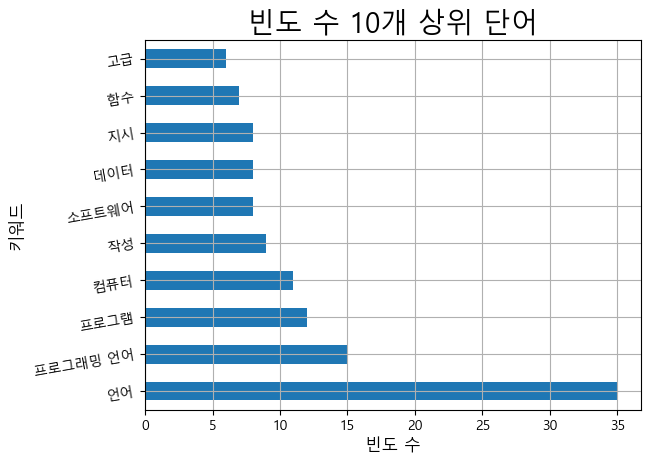

In [145]:
import nltk

nltk_token = nltk.Text(tokens=new_token_list)
bindo_size = 500 # 출현 빈도 수
token_data = nltk_token.vocab().most_common(bindo_size)
print('토큰과 빈도수 확인')
print(token_data)

wordlist = list() # 튜플(단어, 빈도수)를 저장할 리스트

# 단어의 길이가 2이상, 빈도수가 2이상인 데이터는 추출하기
for word, bindo in token_data:
    if (len(word) >= 2 and bindo >= 2):
        wordlist.append((word,bindo))

print('출력 확인')
print(wordlist)

# token_data 파일로 저장하기
import pandas as pd

savedWordFile = dataInFolder + 'word_list.csv'
dataframe = pd.DataFrame(wordlist, columns=['단어','빈도수'])
dataframe.to_csv(savedWordFile, encoding='CP949', index=False)
print(savedWordFile + '파일 저장 완료')

print('상위 top 10개 막대 그래프')
barcount = 10
chartdata = dataframe.set_index('단어').iloc[0:barcount]

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

chartdata.plot(kind='barh', rot=10, grid=True, use_index=True, legend=False)
plt.title('빈도 수 ' + str(barcount) + '개 상위 단어', size=20)
plt.xlabel('빈도 수', size=12)
plt.ylabel('키워드', size=12)

barFileName = dataInFolder + 'bar_chart.png'
plt.savefig(barFileName)
# plt.show()
print(barFileName + '그래프가 생성되었습니다.')

print('빈도를 이용한 워드 클라우드')
# 참조 url = https://amueller.github.io/word_cloud/index.html

./../data/word_cloud.png그래프가 생성되었습니다.
finished


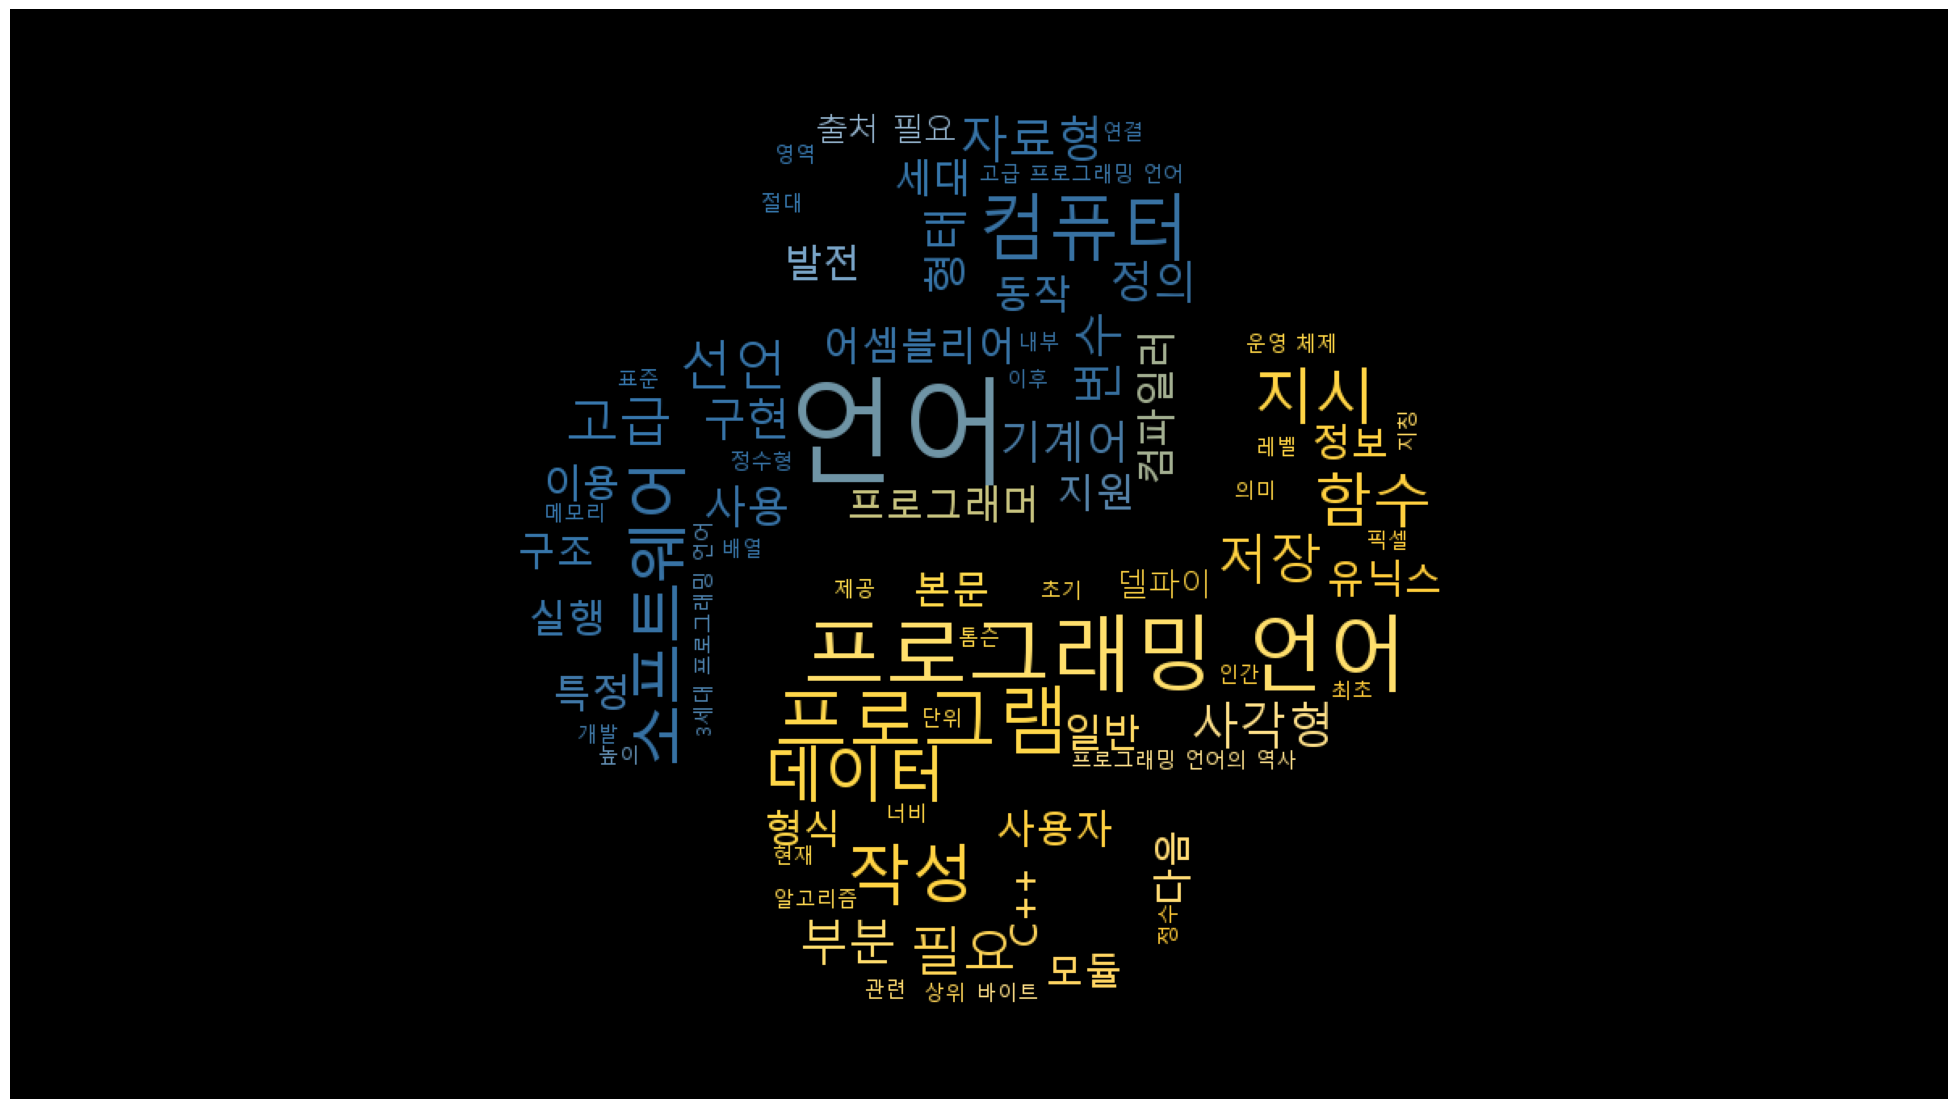

In [170]:
import numpy as np
from PIL import Image # PIL : Python Image Library
from wordcloud import WordCloud

alice_color_file = dataInFolder + 'python02.png' # 워드 클라우드가 그려질 이미지
alice_color_array = np.array(Image.open(alice_color_file)) # 이미지 배열

word_dict = dict(wordlist) # 단어 사전

font_name = 'malgun.ttf' # 글꼴

mycloud = WordCloud(font_path=font_name, mask=alice_color_array, background_color='black')
mycloud = mycloud.generate_from_frequencies(word_dict)

# ImageColorGenerator : 컬러 이미지의 색상 톤을 유지하고자 할 때 사용되는 라이브러리
from wordcloud import ImageColorGenerator
color_generator = ImageColorGenerator(alice_color_array)

mycloud = mycloud.recolor(color_func=color_generator)

plt.figure(figsize=(25,25)) # 새 도화지 준비
plt.axis('off') # 그래프 테두리 없애기
plt.imshow(mycloud)

cloudFileName = dataInFolder + 'word_cloud.png'
plt.savefig(cloudFileName)
print(cloudFileName + '그래프가 생성되었습니다.')

print('finished')

C 프로그래밍 언어로 작성된 단순한 컴퓨터의 프로그램의 소스 코드. 컴파일되어 실행되었을 때 헬로 월드 메시지를 보여주고 있다.
프로그래밍 언어(programming language)는 컴퓨터 시스템을 구동시키는 소프트웨어를 작성하기 위한 형식언어이다. 고급 언어일수록 사람이 사용하는 언어에 가깝다.

일반적으로 말할 때에는 프로그래밍 언어를 지원하는 소프트웨어, 곧 소프트웨어를 작성하기 위한 소프트웨어를 가리키는 때가 많고, 이때에는 프로그래밍 언어와 소프트웨어를 구분하지 않고 소프트웨어를 프로그래밍 언어로 보기도 한다.[출처 필요] 예를 들면, 델파이는 프로그래밍 언어인 오브젝트 파스칼을 지원하는 소프트웨어를 작성하기 위한 소프트웨어일 뿐이지만, 델파이를 별개의 프로그래밍 언어로 보는 때가 더 많다.[출처 필요]

역사
이 부분의 본문은 프로그래밍 언어의 역사입니다.
최초의 컴퓨터는 종종 프로그래밍 언어의 도움 없이 프로그래밍되었는데, 이는 프로그램들을 절대적인 기계어로 작성함으로써 이루어졌다. 10진이나 이진 형태의 프로그램들은 천공 카드나 자기 테이프로부터 읽거나 컴퓨터 프론트 패널의 스위치를 켜고 끔으로써 불러들였다. 절대적인 기계어는 나중에 1세대 프로그래밍 언어(1GL)로 명칭이 정해졌다.

다음 단계로 이른바 2세대 프로그래밍 언어(2GL), 곧 어셈블리어가 개발되었으며 여전히 특정 컴퓨터의 명령어 집합 구조와 밀접하게 관계되었다. 프로그램을 훨씬 더 인간이 읽기 쉽게 만들어주었을 뿐 아니라, 주소 계산 시 따분하고 오류가 발생할 경향이 있는 프로그래머를 안심시켜 주었다.

최초의 고급 프로그래밍 언어, 즉 3세대 프로그래밍 언어(3GL)는 1950년대에 작성되었다. 컴퓨터용으로 설계될 초기의 고급 프로그래밍 언어는 Plankalkül였으며, 콘라트 추제가 1943년부터 1945년까지 독일의 Z3용으로 개발될 것이었다. 그러나 1998년, 2000년까지 구현되지 않았다.[1]

4세대 프로그래밍 언어(4GL)는 3세대 프로그래밍 언어 보다 내부 

./../data/word_cloud.png그래프가 생성되었습니다.
finished


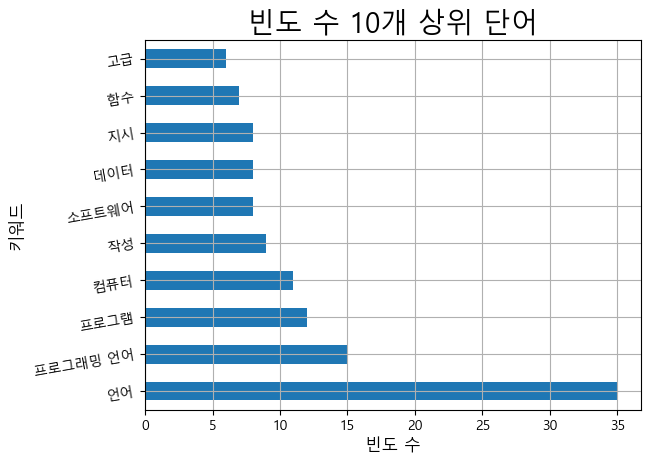

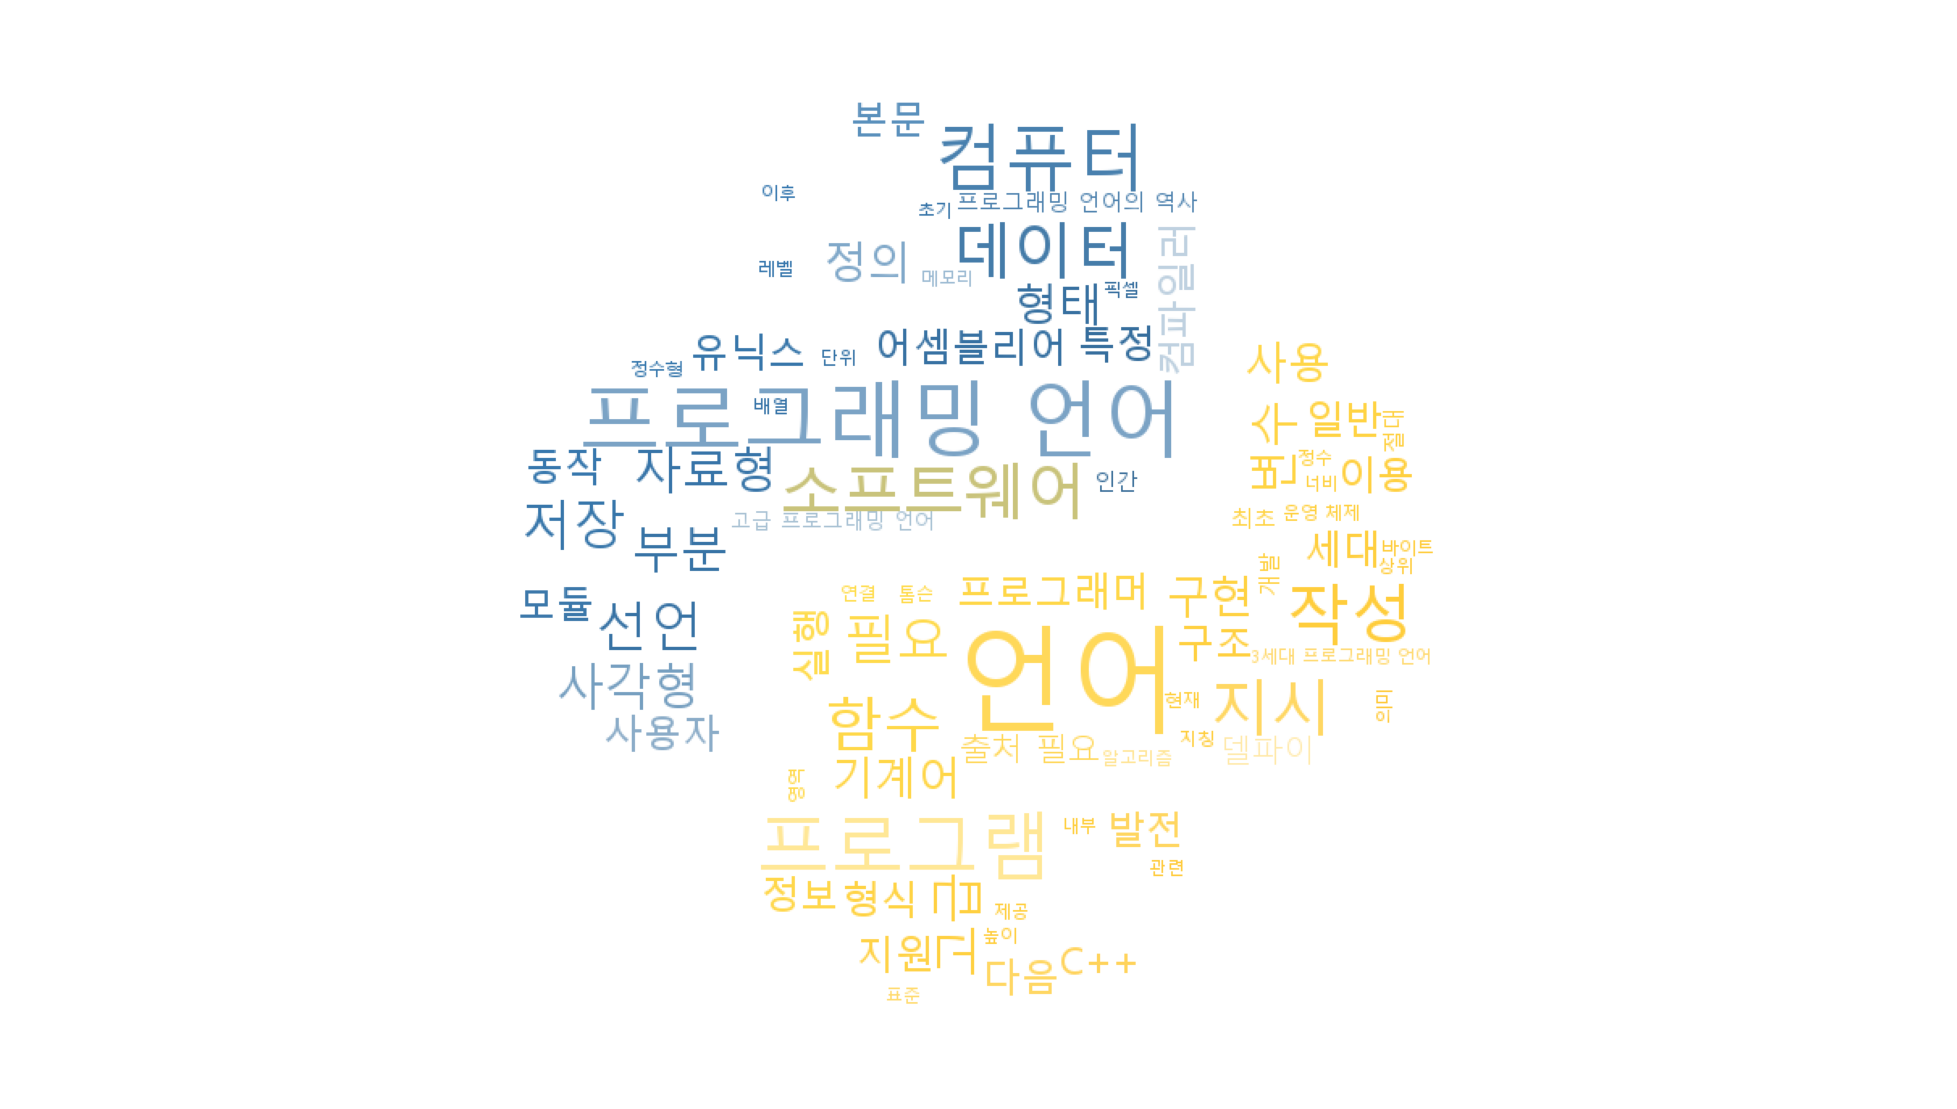

In [169]:
dataInFolder = './../data/'
filename = dataInFolder + 'Programming Language.txt'

language = open(filename, encoding='UTF-8').read()

print(language)

# url : https://konlpy.org/ko/latest/
from konlpy.tag import Komoran

# 사용자 정의 단어들을 정하시고, 사용자 정의 사전에 추가하도록 합니다.
lan_dict = dataInFolder + 'lan_dic.txt' # 사용자 정의 사전
komo = Komoran(userdic=lan_dict) # 객체 생성
token_list = komo.nouns(language) # nouns : 명사 추출

print('토큰 목록')
print(token_list)

# 불용어(stopword) : 빈도는 많지만, 분석시 중요하지 않다고 판단하는 단어들
stop_dict = dataInFolder + 'stop_dict.txt' # 불용어 파일
stop_file = open(stop_dict, encoding='UTF-8').readlines()
stop_words = [word.strip() for word in stop_file]

print('불용어 리스트')
print(stop_words)

new_token_list = [word for word in token_list if word not in stop_words]
print('불용어 제외된 토큰 목록')
print(new_token_list)

# 집합을 이용하여 불용어로 처리된 내용을 확인합니다.
set_token_list = set(token_list)
set_new_token_list = set(new_token_list)
diff = set_token_list.difference(set_new_token_list)
print('불용어 처리된 단어 확인')
print(diff)

import nltk

nltk_token = nltk.Text(tokens=new_token_list)
bindo_size = 500 # 출현 빈도 수
token_data = nltk_token.vocab().most_common(bindo_size)
print('토큰과 빈도수 확인')
print(token_data)

wordlist = list() # 튜플(단어, 빈도수)를 저장할 리스트

# 단어의 길이가 2이상, 빈도수가 2이상인 데이터는 추출하기
for word, bindo in token_data:
    if (len(word) >= 2 and bindo >= 2):
        wordlist.append((word,bindo))

print('출력 확인')
print(wordlist)

# token_data 파일로 저장하기
import pandas as pd

savedWordFile = dataInFolder + 'word_list.csv'
dataframe = pd.DataFrame(wordlist, columns=['단어','빈도수'])
dataframe.to_csv(savedWordFile, encoding='CP949', index=False)
print(savedWordFile + '파일 저장 완료')

print('상위 top 10개 막대 그래프')
barcount = 10
chartdata = dataframe.set_index('단어').iloc[0:barcount]

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

chartdata.plot(kind='barh', rot=10, grid=True, use_index=True, legend=False)
plt.title('빈도 수 ' + str(barcount) + '개 상위 단어', size=20)
plt.xlabel('빈도 수', size=12)
plt.ylabel('키워드', size=12)

barFileName = dataInFolder + 'bar_chart.png'
plt.savefig(barFileName)
# plt.show()
print(barFileName + '그래프가 생성되었습니다.')

print('빈도를 이용한 워드 클라우드')
# 참조 url = https://amueller.github.io/word_cloud/index.html

import numpy as np
from PIL import Image # PIL : Python Image Library
from wordcloud import WordCloud

alice_color_file = dataInFolder + 'python02.png' # 워드 클라우드가 그려질 이미지
alice_color_array = np.array(Image.open(alice_color_file)) # 이미지 배열

word_dict = dict(wordlist) # 단어 사전

font_name = 'malgun.ttf' # 글꼴

mycloud = WordCloud(font_path=font_name, mask=alice_color_array, background_color='white')
mycloud = mycloud.generate_from_frequencies(word_dict)

# ImageColorGenerator : 컬러 이미지의 색상 톤을 유지하고자 할 때 사용되는 라이브러리
from wordcloud import ImageColorGenerator
color_generator = ImageColorGenerator(alice_color_array)

mycloud = mycloud.recolor(color_func=color_generator)

plt.figure(figsize=(25,25)) # 새 도화지 준비
plt.axis('off') # 그래프 테두리 없애기
plt.imshow(mycloud)

cloudFileName = dataInFolder + 'word_cloud.png'
plt.savefig(cloudFileName)
print(cloudFileName + '그래프가 생성되었습니다.')

print('finished')